In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('ecomerce.csv')
df.head()

,\tEmail,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   	Email                500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Time on App           500 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
dtypes: float64(4), object(3)
memory usage: 27.5+ KB


In [4]:
df.describe()

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.00000,500.000000
mean,12.052620,37.060480,3.53336,499.314240
std,0.994418,1.010555,0.99926,79.314764
min,8.510000,33.910000,0.27000,256.670000
25%,11.390000,36.347500,2.93000,445.037500
50%,11.980000,37.070000,3.53500,498.890000
75%,12.752500,37.720000,4.13000,549.312500
max,15.130000,40.010000,6.92000,765.520000


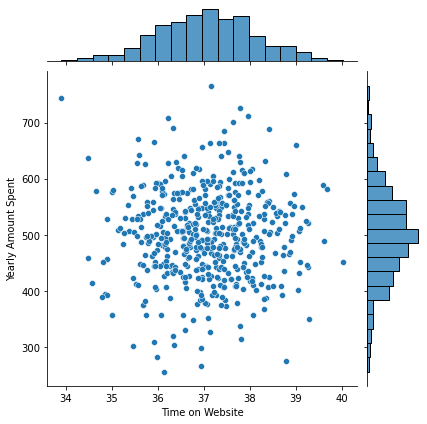

In [9]:
sns.jointplot(data=df,x='Time on Website',y='Yearly Amount Spent')

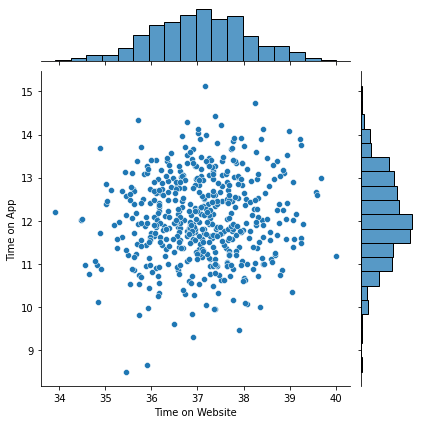

In [10]:
sns.jointplot(data=df,x='Time on Website',y='Time on App')

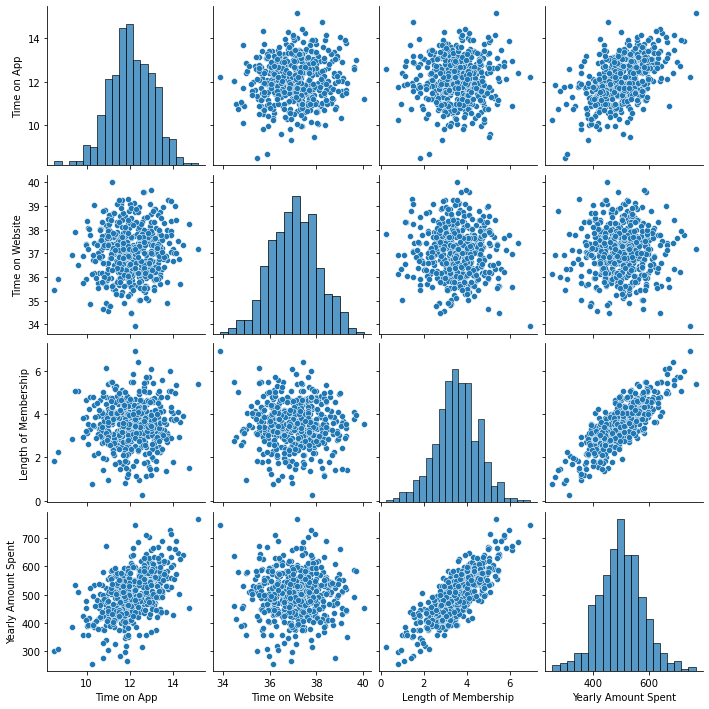

In [11]:
sns.pairplot(df)

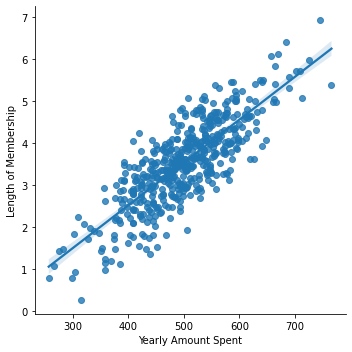

In [13]:
sns.lmplot(data=df,x='Yearly Amount Spent',y='Length of Membership')

In [14]:
df.columns

Index(['\tEmail', 'Address', 'Avatar', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [15]:
X=df[['Time on App','Time on Website','Length of Membership']]
y=df['Yearly Amount Spent']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm=LinearRegression()

In [20]:
lm.fit(X_train,y_train)

LinearRegression()

In [21]:
predictions=lm.predict(X_test)

In [23]:
predictions

array([580.66394431, 400.16408701, 487.18870481, 528.85698442,
       434.6583976 , 542.18059046, 558.16470477, 585.02204256,
       563.51679148, 357.6049573 , 415.90681602, 468.74114671,
       462.96398102, 493.63860062, 503.49357865, 471.57484947,
       667.23425151, 502.16518562, 454.8753687 , 496.99640062,
       576.06818791, 516.25142692, 469.23295259, 415.51751875,
       482.38927458, 392.45040851, 584.14544918, 482.8346966 ,
       411.93546896, 350.34218164, 615.78440689, 531.31823764,
       480.38211597, 536.97607958, 529.72000193, 381.51915739,
       471.59390109, 527.0642161 , 534.75747391, 506.86955767,
       606.8700295 , 421.59026584, 446.68810101, 403.11352459,
       492.65269742, 535.58493074, 507.00263912, 538.79205156,
       367.41436327, 496.63487757, 523.5229275 , 482.98037802,
       529.14210057, 463.30992101, 547.0095218 , 571.79244114,
       574.87391169, 502.82050733, 417.58717964, 515.74666412,
       552.35201585, 451.06699617, 384.29172926, 558.81

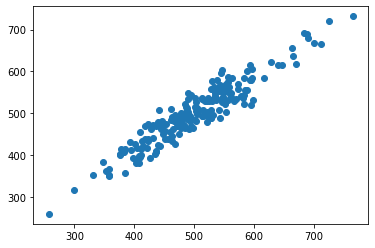

In [25]:
plt.scatter(y_test,predictions)

C:\Users\TATA BHARATH YADAV\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

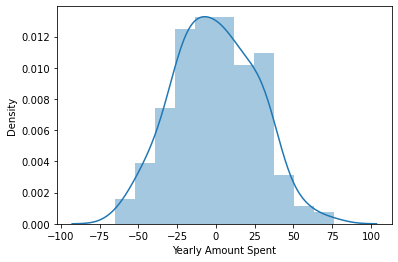

In [26]:
sns.distplot((y_test-predictions))

In [27]:
from sklearn import metrics

In [28]:
metrics.mean_absolute_error(y_test,predictions)

21.721078549079625

In [29]:
metrics.mean_squared_error(y_test,predictions)

705.3971427150158

In [30]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

26.55931367176147

In [32]:
metrics.explained_variance_score(y_test,predictions)

0.8915911803396865

In [33]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['coeff'])
cdf

,coeff
Time on App,37.909909
Time on Website,-0.228407
Length of Membership,62.522599
